# Seattle AirBnB dataset - exploration JH


_ _ _

## Table of Contents
1. [Introduction](#introduction)
2. [Goals for Notebook](#goals)
3. [Imports, Data Loading and Read Data Description](#load_data) 
    1. [Initial Observations](#observations1)
    2. [Demonstration of Business and Data understanding](#understanding)
    3. [Possible Questions](#questions)
    4. [Data Preparation](#prep)
       1. [Clean listings df](#listings)
       2. [Clean calendar df](#calendar)
       3. [Clean reviews df](#reviews)
       4. [Merge](#finalmerge)
4. [Question 1: Is there any buzz word in airbnb listing 'name' that is associated with more bookings?](#question1)
    1. [Insight 1](#insight1)
5. [Question 2: Does having more pictures help increase bookings?](#question2)
    1. [Insight 2](#insight2)
6. [Question 3: Which neighborhood is most profitable?](#question3)
    1. [Insight 3](#insight3)
7. [Modeling](#modeling)
    1. [Evaluating Results](#evaluating_results)
9. [Next Steps](#next_steps)

_ _ _

## Introduction: <a name="introduction"></a>

**Context:**
   
   Since 2008, guests and hosts have used Airbnb to travel in a more unique, personalized way. As part of the Airbnb Inside initiative, this dataset describes the listing activity of homestays in Seattle, WA.

**Content:**
   
   The following Airbnb activity is included in this Seattle dataset:

Listings, including full descriptions and average review score
Reviews, including unique id for each reviewer and detailed comments
Calendar, including listing id and the price and availability for that day

*Source: https://www.kaggle.com/airbnb/seattle/data

_ _ _

## Goals for notebook: <a name="goals"></a>
My goal will be to define and answer three questions inspired by this data. The goal of these questions shoudl be related to business or real-world applications.

My goal is to follow the **CRISP-DM** method:
> 1. Develop Business Understanding
> 2. Develop Data Understanding
> 3. Data Preparation
> 4. Modeling
> 5. Evaluating Results
> 6. Deploying changes based on results

_ _ _

## Imports, Data Loading and Read Data Description <a name="load_data"></a>

In [207]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif, f_classif, chi2, RFE

%matplotlib inline

#from sklearn.feature_selection import mutual_info_classif, f_classif, chi2, RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, median_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler

In [208]:
listings = pd.read_csv('listings.csv')
calendar = pd.read_csv('calendar.csv')
reviews = pd.read_csv('reviews.csv')

In [209]:
df_lis = [listings, calendar, reviews]
df_lis_names = ['listings', 'calendar', 'reviews']
n=0
for df in df_lis:
    print("Record:", df_lis_names[n])
    n=n+1
    display(df.head(3))
    print(df.shape)
    print('\n')

Record: listings


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15


(3818, 92)


Record: calendar


,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN


(1393570, 4)


Record: reviews


,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."


(84849, 6)




In [210]:
listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

### A. Initial Observations: <a name="observations1"></a>
- I can combine these data sets on listing_id, but I need to change 'id' to 'listing_id' on listings df
- there are a lot of columns that I don't need
- columns of type int/boolean/float would be most useful

### B. Demonstration of Business and Data Understanding: <a name="understanding"></a>
> The business goal for airbnb are clear: to drive revenue. This can be thought of from a mulitude of angles considering the things that factor into revenue growth. It is important to have consistent and high rates of bookings, at consistent market reflective prices. It is important to recieve positive feedback in reviews in order to drive further growth by way of more bookings, causing more demand and even a possible increase in prices. 

> The data at hand can help to answer some of these questions that ultimately lead back to driving revenue. We have data reflecting listings available, calendar of availability, as well as reviews. This will all be helpful in creating business insights.

### C. Possible Questions: <a name="questions"></a>
- If host_id has more than one listing_id are they more likely to be better?
- Is there any buzz word in 'name' that is associated with more bookings?
- Does having more pictures help?
- Which review score is most indicative of a good overall score?
- What factors have the largest affect on how much money is made from each airbnb listing?


### D. Data Preparation <a name="prep"></a>

#### a. Clean listings df <a name="listings"></a>

In [211]:
## change 'id' to 'listing_id' in listings df
listings.rename(columns = {'id': 'listing_id'}, inplace= True)

In [212]:
## Drop any column that has only one variable
for col in listings.columns:
    if len(listings[col].unique()) == 1:
        listings.drop(col,inplace=True,axis=1)   

In [213]:
## Change superhost to boolean
listings['host_is_superhost'] = listings['host_is_superhost'].replace({'t': True, 
                                                                       'f': False})

In [214]:
## replace photo info to boolean (has photo or doesn't have photo)
# replace non nan values in 'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url'
listings['thumbnail_url'] = ((listings['thumbnail_url'].notnull()).astype('int'))
listings['medium_url'] = ((listings['medium_url'].notnull()).astype('int'))
listings['picture_url'] = ((listings['picture_url'].notnull()).astype('int'))
listings['xl_picture_url'] = ((listings['xl_picture_url'].notnull()).astype('int'))

In [215]:
## Change dtype of price from string to int
listings['price'] = listings['price'].str.strip('$')
listings['price'] = listings['price'].str.split('.',expand=True)
listings['price'] = listings['price'].str.replace(',', '').astype(int)

In [216]:
## Change dtype of cleaning feww from string to float
listings['cleaning_fee']=listings['cleaning_fee'].str.lstrip('$').astype(float)

In [217]:
## Create column for binned review scores
listings['review_bins']= pd.cut(listings.review_scores_rating,bins=[0,10,20,30,40,50,60,70,80,90,100],
                             labels=['1-10','11-20','21-30','31-40','41-50','51-60','61-70','71-80','81-90','91-100'])

In [218]:
## Create column for binned number of listings
listings['num_listings_bins']= pd.cut(listings.host_listings_count,bins=[0,5,20,100,10000],
                                   labels=['1-5','6-20','21-100','101-inf'])

In [219]:
## I will consider the number of non available days in the next 60 days to be the 
# number of bookings for the upcoming 60 days bc this is an appropriate time to plan a trip
listings['num_bookings_60d']= 60-listings['availability_60']

## Create column for binned number of bookings
listings['num_bookings_bins']= pd.cut(listings.num_bookings_60d,bins=[0,10,20,30,40,50,60],
                                   labels=['1-10','11-20','21-30','31-40','41-50','51-60'])


In [220]:
## Create column for binned price of airbnb
listings['price_bins']= pd.cut(listings.price,bins=[0,100,200,300,400,500,600,700,800,900,1000],
                                   labels=['1-100','101-200','201-300','301-400','401-500','501-600',
                                           '601-700','701-800','801-900','901-1000'])

In [221]:
## Add profit column (*I am defining profit as money to be made in next 60 days)
listings['profit'] = listings['price'] * listings['num_bookings_60d']

In [222]:
## Add number of photos column
pics=['thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url']
num_pics =listings[pics].sum(axis=1)
listings['num_pics']=num_pics

#### b. Clean calendar df <a name="calendar"></a>

In [223]:
calendar['available'] = calendar['available'].replace({'t': True, 
                                    'f': False})

#### c. Clean reviews df <a name="reviews"></a>

In [224]:
reviews.head(3)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."


#### d. Merge <a name="finalmerge"></a>

In [225]:
## I actually realize I only need listings 
df = listings

In [226]:
df.shape

(3818, 88)

_ _ _

## Question 1: Is there any buzz word in airbnb listing 'name' that is associated with more bookings? <a name="question1"></a>

In [227]:
lis_q1 = ['listing_id', 'name', 'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',
           'review_scores_value', 'reviews_per_month', 'review_bins', 'num_bookings_60d', 'num_bookings_bins']
df_q1 = df[lis_q1]

In [228]:
# create df of words used in names of airbnbs
words_df = df_q1['name'].str.split(' ',expand=True)

In [229]:
words_df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,Stylish,Queen,Anne,Apartment,None,None,None,None,None,None,None
1,Bright,&,Airy,Queen,Anne,Apartment,None,None,None,None,None
2,New,Modern,House-Amazing,water,view,None,None,None,None,None,None
3,Queen,Anne,Chateau,None,None,None,None,None,None,None,None
4,Charming,craftsman,3,bdm,house,None,None,None,None,None,None


In [230]:
drop=[1,2,3,4,5,6,7,8,9,10]
words_df.drop(drop, axis=1, inplace=True)

In [231]:
words_df.describe()

,0
count,3818
unique,893
top,Cozy
freq,201


In [232]:
to_join = ['review_bins', 'num_bookings_bins']
words_df = words_df.join(df_q1[to_join])

In [233]:
nineties_words = words_df[words_df['review_bins']=='91-100']
a = nineties_words.describe().iloc[2,0] # most common word in name for airbnbs with review score of 91-100
print("most common word in name for airbnbs with review score of 91-100:", a)

eighties_words = words_df[words_df['review_bins']=='81-90']
b = eighties_words.describe().iloc[2,0] # most common word in name for airbnbs with review score of 81-90
print("most common word in name for airbnbs with review score of 81-90:", b)

seventies_words = words_df[words_df['review_bins']=='71-80']
c = seventies_words.describe().iloc[2,0] # most common word in name for airbnbs with review score of 71-80
print("most common word in name for airbnbs with review score of 71-80:", c)

sixties_words = words_df[words_df['review_bins']=='61-70']
d = sixties_words.describe().iloc[2,0] # most common word in name for airbnbs with review score of 61-70
print("most common word in name for airbnbs with review score of 91-100:", d)

fifties_words = words_df[words_df['review_bins']=='51-60']
e = fifties_words.describe().iloc[2,0] # most common word in name for airbnbs with review score of 51-60
print("most common word in name for airbnbs with review score of 91-100:", e)

thirties_words = words_df[words_df['review_bins']=='31-40']
f = thirties_words.describe().iloc[2,0] # most common word in name for airbnbs with review score of 31-40
print("most common word in name for airbnbs with review score of 91-100:", f)

tens_words = words_df[words_df['review_bins']=='11-20']
g = tens_words.describe().iloc[2,0] # most common word in name for airbnbs with review score of 11-20
print("most common word in name for airbnbs with review score of 91-100:", g)

most common word in name for airbnbs with review score of 91-100: Cozy
most common word in name for airbnbs with review score of 81-90: Cozy
most common word in name for airbnbs with review score of 71-80: Cozy
most common word in name for airbnbs with review score of 91-100: Center
most common word in name for airbnbs with review score of 91-100: Spacious
most common word in name for airbnbs with review score of 91-100: Capital
most common word in name for airbnbs with review score of 91-100: Belltown


In [234]:
high_booking = words_df[words_df['num_bookings_bins']=='51-60']
a = high_booking.describe().iloc[2,0] # most common word in name for airbnbs with 51-60 bookings
print("most common word in name for airbnbs with 51-60 bookings:", a)

fourties_booking = words_df[words_df['num_bookings_bins']=='41-50']
b = fourties_booking.describe().iloc[2,0] # most common word in name for airbnbs with 41-50 bookings
print("most common word in name for airbnbs with 41-50 bookings:", b)

thirties_booking = words_df[words_df['num_bookings_bins']=='31-40']
c = thirties_booking.describe().iloc[2,0] # most common word in name for airbnbs with 31-40 bookings
print("most common word in name for airbnbs with 31-40 bookings:", c)

twenties_booking = words_df[words_df['num_bookings_bins']=='21-30']
d = twenties_booking.describe().iloc[2,0] # most common word in name for airbnbs with 21-30 bookings
print("most common word in name for airbnbs with 21-30 bookings:", d)

tens_booking = words_df[words_df['num_bookings_bins']=='11-20']
e = tens_booking.describe().iloc[2,0] # most common word in name for airbnbs with 11-20 bookings
print("most common word in name for airbnbs with 11-20 bookings:", e)

low_booking = words_df[words_df['num_bookings_bins']=='1-10']
f = low_booking.describe().iloc[2,0] # most common word in name for airbnbs with 1-10 bookings
print("most common word in name for airbnbs with 1-10 bookings:", f)

most common word in name for airbnbs with 51-60 bookings: Cozy
most common word in name for airbnbs with 41-50 bookings: Cozy
most common word in name for airbnbs with 31-40 bookings: Charming
most common word in name for airbnbs with 21-30 bookings: Cozy
most common word in name for airbnbs with 11-20 bookings: Private
most common word in name for airbnbs with 1-10 bookings: Cozy


In [235]:
## Now let's actually use some statistics to see if there is a 
# significant impact of buzz words on review score or number of bookings
test=words_df

In [236]:
to_join = ['num_bookings_60d', 'review_scores_rating']
test = test.join(df_q1[to_join])

In [237]:
drop2=['num_bookings_bins', 'review_bins']
test.drop(drop2, axis=1, inplace=True)

In [238]:
test= pd.get_dummies(test)

In [239]:
test = test.dropna()

In [240]:
#def test_anova(data, features, target):
features = ['0_Seattle', '0_Cozy', '0_Walk',"0_Ted's",'0_Private']
target= ['num_bookings_60d']
f, pval = f_classif(test[features], test[target])
result = pd.DataFrame(index=features, data={'f-statistic': f, 'p-value': pval}).sort_values('f-statistic', ascending=False)
color_fail = lambda v: 'color: %s' % ('red' if v > 0.05 else 'green')
display(result.style.applymap(color_fail, subset='p-value').format("{:.2f}"))
#    return result

/Users/jessica.horvath@ibm.com/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,f-statistic,p-value
0_Walk,1.94,0.00
0_Cozy,1.39,0.03
0_Private,0.85,0.79
0_Seattle,0.80,0.86
0_Ted's,0.17,1.00


In [241]:
#def test_anova(data, features, target):
features = ['0_Seattle', '0_Cozy', '0_Walk',"0_Ted's",'0_Private']
target= ['review_scores_rating']
f, pval = f_classif(test[features], test[target])
result = pd.DataFrame(index=features, data={'f-statistic': f, 'p-value': pval}).sort_values('f-statistic', ascending=False)
color_fail = lambda v: 'color: %s' % ('red' if v > 0.05 else 'green')
display(result.style.applymap(color_fail, subset='p-value').format("{:.2f}"))
#    return result

/Users/jessica.horvath@ibm.com/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,f-statistic,p-value
0_Ted's,3.32,0.00
0_Private,1.29,0.10
0_Cozy,1.01,0.45
0_Seattle,0.91,0.63
0_Walk,0.26,1.00


### Insight 1:  The most commonly used word is "cozy". 
This word has association with more bookings. The word cozy actually was statistically significant in the number of bookings(f-score=1.39, p=0.02), but not significant in the review ratings (f-score=1.10, p=0.45). 
<a name="insight1"></a>

_ _ _

## Question 2:  Does having more pictures help increase bookings? <a name="question2"></a>

In [242]:
lis_q2 = ['listing_id', 'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url', 
           'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_value',
          'reviews_per_month', 'availability_30', 'availability_60', 'availability_90', 'availability_365',
          'num_bookings_60d', 'num_bookings_bins']
df_q2 = df[lis_q2]

In [243]:
df_q2.head()

,listing_id,thumbnail_url,medium_url,picture_url,xl_picture_url,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_value,reviews_per_month,availability_30,availability_60,availability_90,availability_365,num_bookings_60d,num_bookings_bins
0,241032,0,0,1,0,207,95.0,10.0,10.0,4.07,14,41,71,346,19,11-20
1,953595,1,1,1,1,43,96.0,10.0,10.0,1.48,13,13,16,291,47,41-50
2,3308979,0,0,1,0,20,97.0,10.0,10.0,1.15,1,6,17,220,54,51-60
3,7421966,0,0,1,0,0,NaN,NaN,NaN,NaN,0,0,0,143,60,51-60
4,278830,0,0,1,0,38,92.0,9.0,9.0,0.89,30,60,90,365,0,NaN


In [244]:
pics=['thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url']
num_pics =df_q2[pics].sum(axis=1)

In [245]:
df_q2['num_pics']=num_pics

/Users/jessica.horvath@ibm.com/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [246]:
df.shape

(3818, 88)

In [248]:
#def test_anova(data, features, target):
features = ['thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url', 'num_pics']
target= ['num_bookings_60d']
f, pval = f_classif(df_q2[features], df_q2[target])
result = pd.DataFrame(index=features, data={'f-statistic': f, 'p-value': pval}).sort_values('f-statistic', ascending=False)
color_fail = lambda v: 'color: %s' % ('red' if v > 0.05 else 'green')
display(result.style.applymap(color_fail, subset='p-value').format("{:.2f}"))
#    return result

/Users/jessica.horvath@ibm.com/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessica.horvath@ibm.com/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [2] are constant.
  UserWarning)
/Users/jessica.horvath@ibm.com/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


,f-statistic,p-value
num_pics,1.07,0.33
thumbnail_url,1.07,0.33
medium_url,1.07,0.33
xl_picture_url,1.07,0.33
picture_url,nan,nan


### Insight 2: More listing photos do not mean more bookings.<a name="insight2"></a>
Although I would have predicted that more photos may reflect better on a listing thus resulting in more bookings, it does not seem to be the case. Perhaps it is the quality of the photos rather than the quantity that is more important, however that would be difficult to analyze.

## Question 3: Which neighborhood is most profitable?<a name="question3"></a>

In [296]:
lis_q3 = ['listing_id', 'profit', 'neighbourhood_cleansed','neighbourhood_group_cleansed', 'review_scores_location',
          'price', 'price_bins','num_bookings_60d', 'num_bookings_bins']
df_q3 = df[lis_q3]

In [297]:
df_q3.head()

,listing_id,profit,neighbourhood_cleansed,neighbourhood_group_cleansed,review_scores_location,price,price_bins,num_bookings_60d,num_bookings_bins
0,241032,1615,West Queen Anne,Queen Anne,9.0,85,1-100,19,11-20
1,953595,7050,West Queen Anne,Queen Anne,10.0,150,101-200,47,41-50
2,3308979,52650,West Queen Anne,Queen Anne,10.0,975,901-1000,54,51-60
3,7421966,6000,West Queen Anne,Queen Anne,NaN,100,1-100,60,51-60
4,278830,0,West Queen Anne,Queen Anne,9.0,450,401-500,0,NaN


In [298]:
df_q3.groupby('neighbourhood_group_cleansed')

In [299]:
x =df_q3.groupby('neighbourhood_group_cleansed')['num_bookings_60d']

In [300]:
r = df_q3[df_q3['neighbourhood_group_cleansed']=='Queen Anne']

In [301]:
r['num_bookings_60d'].sum()

7948

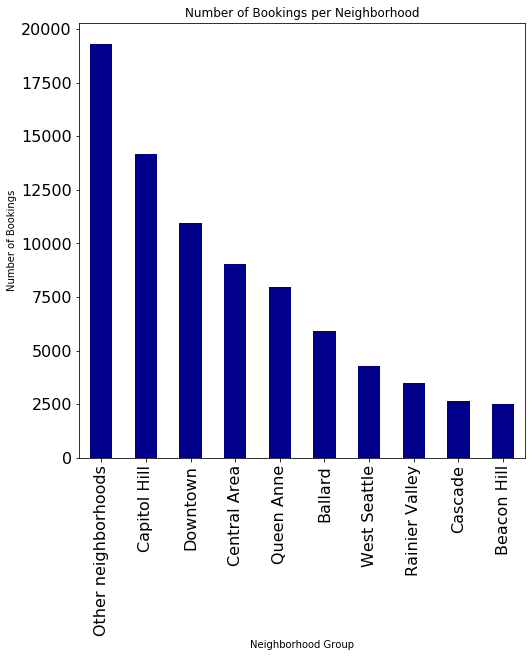

In [302]:
(df_q3.groupby('neighbourhood_group_cleansed')['num_bookings_60d'].sum().sort_values(ascending=False).head(10)).plot(kind='bar', color='darkblue',figsize=(8,8), fontsize=16);
plt.xlabel("Neighborhood Group");
plt.ylabel("Number of Bookings");
plt.title("Number of Bookings per Neighborhood");

In [303]:
df_q3[df_q3['neighbourhood_group_cleansed']=='Queen Anne']['num_bookings_60d'].sum()

7948

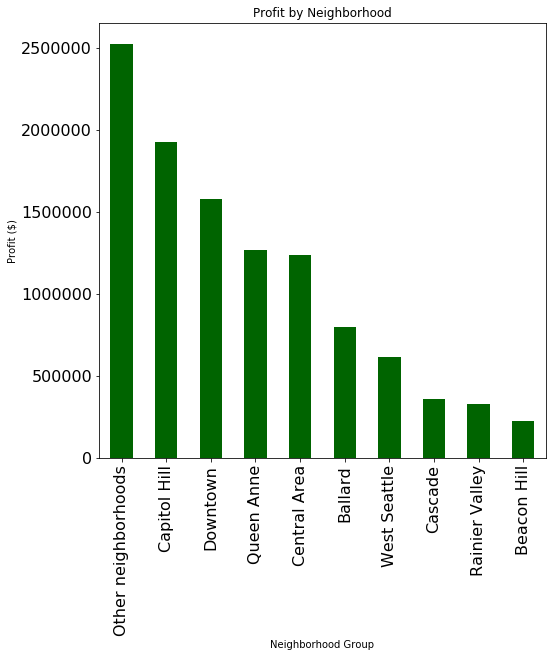

In [304]:
(df_q3.groupby('neighbourhood_group_cleansed')['profit'].sum().sort_values(ascending=False).head(10)).plot(kind='bar',color='darkgreen' ,figsize=(8,8), fontsize=16);
plt.xlabel("Neighborhood Group");
plt.ylabel("Profit ($)");
plt.title("Profit by Neighborhood");

### Insight 3: "Other neighborhoods" are booked most and attributed with most profit. <a name="insight3"></a>
It is interesting that these two graphs look nearly identical. The first place we see that there is a discrepency between the two is that the Central Area tends to be booked more than Queen Anne, but listings in Queen Anne neighborhoods make more profit than those in Central Area. 

_ _ _

## Modeling<a name="modeling"></a>
I will use a Random Forest Regression to attempt to predict what airbnb listings factors are most highly correlated with highter profits. It should be noted that "profit" is definted as money to be made in the next 60 days. 

In [273]:
modeling_feats = ['property_type','host_response_time','host_response_rate','host_is_superhost', 
                  'host_identity_verified', 'host_total_listings_count','neighbourhood_group_cleansed',
                  'accommodates','bathrooms', 'bedrooms', 'beds', 'bed_type','price','cleaning_fee',
                  'minimum_nights','availability_30', 'availability_60', 'availability_90', 'availability_365', 
                  'number_of_reviews','review_scores_rating', 'instant_bookable',
                  'cancellation_policy','reviews_per_month', 'profit']
df_model = df[modeling_feats]
df_model.head()

,property_type,host_response_time,host_response_rate,host_is_superhost,host_identity_verified,host_total_listings_count,neighbourhood_group_cleansed,accommodates,bathrooms,bedrooms,...,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,instant_bookable,cancellation_policy,reviews_per_month,profit
0,Apartment,within a few hours,96%,False,t,3.0,Queen Anne,4,1.0,1.0,...,14,41,71,346,207,95.0,f,moderate,4.07,1615
1,Apartment,within an hour,98%,True,t,6.0,Queen Anne,4,1.0,1.0,...,13,13,16,291,43,96.0,f,strict,1.48,7050
2,House,within a few hours,67%,False,t,2.0,Queen Anne,11,4.5,5.0,...,1,6,17,220,20,97.0,f,strict,1.15,52650
3,Apartment,NaN,NaN,False,t,1.0,Queen Anne,3,1.0,0.0,...,0,0,0,143,0,NaN,f,flexible,NaN,6000
4,House,within an hour,100%,False,t,2.0,Queen Anne,6,2.0,3.0,...,30,60,90,365,38,92.0,f,strict,0.89,0


In [274]:
df_model.dropna(inplace=True)

/Users/jessica.horvath@ibm.com/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [275]:
## CLEANINGS STEPS

def clean_data(df):
    """
    Perform dropna, re-encoding and get dummies
    
    INPUT: listings DataFrame conatining only features to be modeled
    OUTPUT: Cleaned DataFrame
    """
    df = encode_instant_bookable(df)
    df = encode_superhost(df)
    df = encode_host_identity_verified(df)
    df = encode_cancellation_policy(df)
    df = encode_host_response_time(df)
    df = resp_rate_to_int(df)
  #  df = get_dums(df)
    
    return df

def encode_instant_bookable(df):
    df['instant_bookable'] = df['instant_bookable'].replace({'f': 0, 't': 1,})
    return df

def encode_superhost(df):
    df['host_is_superhost'] = df['host_is_superhost'].replace({False: 0, True: 1,})
    return df

def encode_host_identity_verified(df):
    df['host_identity_verified'] = df['host_identity_verified'].replace({'f': 0, 't': 1,})
    return df

def encode_cancellation_policy(df):
    df['cancellation_policy'] = df['cancellation_policy'].replace({'strict': 0, 
                                                                   'moderate': 1,
                                                                   'flexible': 2})
    return df

def encode_host_response_time(df):
    df['host_response_time'] = df['host_response_time'].replace({'within a few hours': 0, 
                                                           'within an hour': 1,
                                                           'within a day': 2,
                                                           'a few days or more': 3})
    return df

def resp_rate_to_int(df):
    df['host_response_rate'] = df['host_response_rate'].str.rstrip('%')
    df['host_response_rate'] = df['host_response_rate'].astype(int)
    return df

def get_dums(df):
    #feats_to_OHE = ['property_type', 'neighbourhood_group_cleansed','bed_type']
    df = pd.get_dummies(df)
    return df


In [276]:
df_model = clean_data(df_model);

/Users/jessica.horvath@ibm.com/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/jessica.horvath@ibm.com/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/jessica.horvath@ibm.com/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

In [277]:
df_model.head()

,property_type,host_response_time,host_response_rate,host_is_superhost,host_identity_verified,host_total_listings_count,neighbourhood_group_cleansed,accommodates,bathrooms,bedrooms,...,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,instant_bookable,cancellation_policy,reviews_per_month,profit
1,Apartment,1,98,1,1,6.0,Queen Anne,4,1.0,1.0,...,13,13,16,291,43,96.0,0,0,1.48,7050
2,House,0,67,0,1,2.0,Queen Anne,11,4.5,5.0,...,1,6,17,220,20,97.0,0,0,1.15,52650
4,House,1,100,0,1,2.0,Queen Anne,6,2.0,3.0,...,30,60,90,365,38,92.0,0,0,0.89,0
7,Cabin,1,100,1,1,5.0,Queen Anne,2,1.0,1.0,...,22,42,42,100,173,97.0,0,0,4.73,1080
9,Apartment,1,98,1,1,6.0,Queen Anne,4,1.0,1.0,...,6,19,49,324,32,97.0,0,0,1.55,6150


In [278]:
# Split the data into features and target label
profit_raw = df_model['profit']
features_raw = df_model.drop('profit', axis = 1)

In [279]:
features_raw.dtypes

property_type                    object
host_response_time                int64
host_response_rate                int64
host_is_superhost                 int64
host_identity_verified            int64
host_total_listings_count       float64
neighbourhood_group_cleansed     object
accommodates                      int64
bathrooms                       float64
bedrooms                        float64
beds                            float64
bed_type                         object
price                             int64
cleaning_fee                    float64
minimum_nights                    int64
availability_30                   int64
availability_60                   int64
availability_90                   int64
availability_365                  int64
number_of_reviews                 int64
review_scores_rating            float64
instant_bookable                  int64
cancellation_policy               int64
reviews_per_month               float64
dtype: object

In [269]:
features_raw.head()

,property_type,host_response_time,host_response_rate,host_is_superhost,host_identity_verified,host_total_listings_count,neighbourhood_group_cleansed,accommodates,bathrooms,bedrooms,...,minimum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,instant_bookable,cancellation_policy,reviews_per_month
1,Apartment,1,98,True,1,6.0,Queen Anne,4,1.0,1.0,...,2,13,13,16,291,43,96.0,0,0,1.48
2,House,0,67,False,1,2.0,Queen Anne,11,4.5,5.0,...,4,1,6,17,220,20,97.0,0,0,1.15
4,House,1,100,False,1,2.0,Queen Anne,6,2.0,3.0,...,1,30,60,90,365,38,92.0,0,0,0.89
7,Cabin,1,100,True,1,5.0,Queen Anne,2,1.0,1.0,...,2,22,42,42,100,173,97.0,0,0,4.73
9,Apartment,1,98,True,1,6.0,Queen Anne,4,1.0,1.0,...,2,6,19,49,324,32,97.0,0,0,1.55


In [280]:
numerical_feats = ['host_response_time', 'host_response_rate','host_is_superhost','host_identity_verified', 
                   'host_total_listings_count','accommodates', 'bathrooms', 'bedrooms', 
                   'beds', 'price', 'cleaning_fee', 'minimum_nights', 'availability_30', 'availability_60', 
                   'availability_90', 'availability_365', 'number_of_reviews', 'review_scores_rating', 
                   'instant_bookable', 'cancellation_policy', 'reviews_per_month']

In [281]:
feats_to_ohe = ['property_type', 'neighbourhood_group_cleansed','bed_type']

In [282]:
features_log_transformed = pd.DataFrame(data = features_raw)

In [283]:
## Normalizing numerical features
# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)
numerical = numerical_feats

features_log_minmax_transform = pd.DataFrame(data = features_log_transformed)
features_log_minmax_transform[numerical] = scaler.fit_transform(features_log_transformed[numerical])

# Show an example of a record with scaling applied
display(features_log_minmax_transform.head(n = 5))

,property_type,host_response_time,host_response_rate,host_is_superhost,host_identity_verified,host_total_listings_count,neighbourhood_group_cleansed,accommodates,bathrooms,bedrooms,...,minimum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,instant_bookable,cancellation_policy,reviews_per_month
1,Apartment,0.333333,0.975904,1.0,1.0,0.009980,Queen Anne,0.200000,0.222222,0.142857,...,0.001001,0.433333,0.216667,0.177778,0.797260,0.104218,0.9500,0.0,0.0,0.132058
2,House,0.000000,0.602410,0.0,1.0,0.001996,Queen Anne,0.666667,1.000000,0.714286,...,0.003003,0.033333,0.100000,0.188889,0.602740,0.047146,0.9625,0.0,0.0,0.102004
4,House,0.333333,1.000000,0.0,1.0,0.001996,Queen Anne,0.333333,0.444444,0.428571,...,0.000000,1.000000,1.000000,1.000000,1.000000,0.091811,0.9000,0.0,0.0,0.078324
7,Cabin,0.333333,1.000000,1.0,1.0,0.007984,Queen Anne,0.066667,0.222222,0.142857,...,0.001001,0.733333,0.700000,0.466667,0.273973,0.426799,0.9625,0.0,0.0,0.428051
9,Apartment,0.333333,0.975904,1.0,1.0,0.009980,Queen Anne,0.200000,0.222222,0.142857,...,0.001001,0.200000,0.316667,0.544444,0.887671,0.076923,0.9625,0.0,0.0,0.138434


In [284]:
# TODO: One-hot encode the 'features_log_minmax_transform' data using pandas.get_dummies()
features_final = pd.get_dummies(features_log_minmax_transform)

# Print the number of features after one-hot encoding
encoded = list(features_final.columns)
print("{} total features after one-hot encoding.".format(len(encoded)))

57 total features after one-hot encoding.


In [285]:
# Split the 'features' and 'profit' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_final, 
                                                    profit_raw, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 1747 samples.
Testing set has 437 samples.


In [286]:
feats= features_final.columns

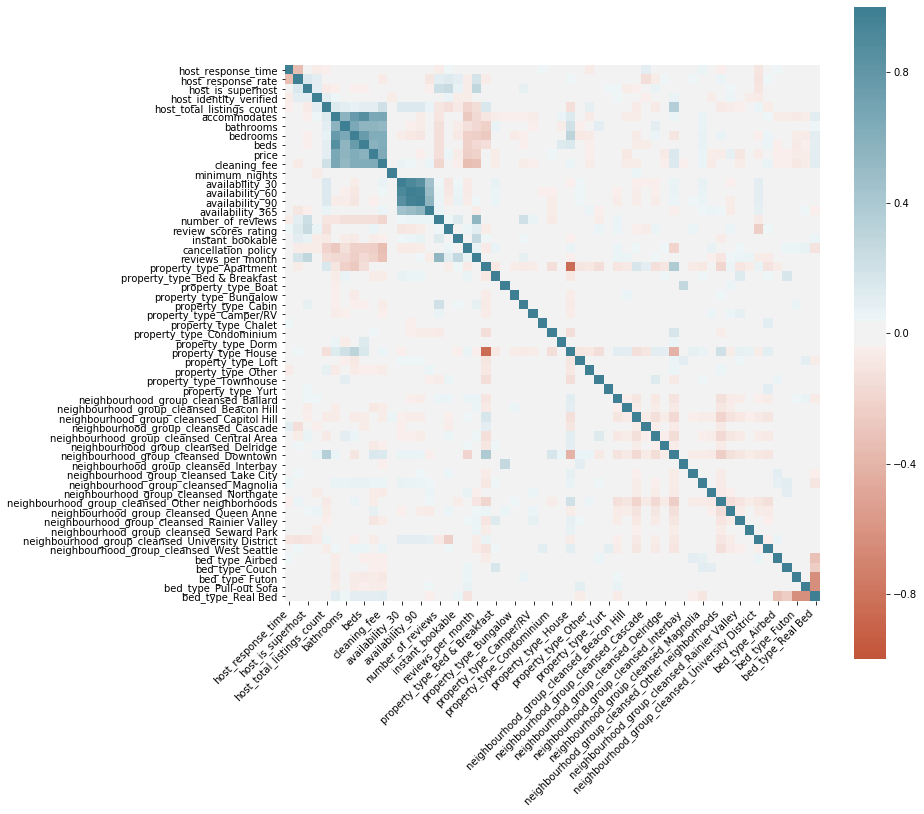

In [287]:
## Check correlation matrix

plt.figure(figsize=(12,12))
ax = sns.heatmap(X_train[feats].corr(), vmin=-1, vmax=1, center=0,
                 cmap=sns.diverging_palette(20, 220, n=200),
                 square=True)

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right');

In [288]:
# calculate correlation between all significant features 

correlated_features = X_train[feats].corr().abs().unstack().sort_values(ascending=False)
correlated_features = correlated_features.reset_index(name='correlation').rename({'level_0': 'feature_1', 'level_1': 'feature_2'}, axis=1)
correlated_features = correlated_features[correlated_features['feature_1'] != correlated_features['feature_2']] # remove duplicate pairs
correlated_features.sort_values('correlation', ascending=False).head()

,feature_1,feature_2,correlation
57,availability_60,availability_90,0.967552
58,availability_90,availability_60,0.967552
59,availability_60,availability_30,0.925830
60,availability_30,availability_60,0.925830
61,accommodates,beds,0.859824


In [289]:
# keep features that are significant AND are not too highly correlated with eachother

feats_final = list()
threshold = 0.5
# for new_feature in r.sort_values('f-statistic', ascending=False).index:
for new_feature in feats:
    if (correlated_features.loc[(correlated_features['feature_1'] == new_feature) & (correlated_features['feature_2'].isin(feats_final)), 'correlation'].abs() < threshold).all():
        feats_final.append(new_feature)
#feats_final

In [290]:
features_final = features_final[feats_final] ## Select only features that are not so highly correlated

In [291]:
# Split the 'features' and 'profit' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_final, 
                                                    profit_raw, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 1747 samples.
Testing set has 437 samples.


In [292]:
ForestRegressor = RandomForestRegressor(n_estimators=500)
ForestRegressor.fit(X_train, y_train)
y_test_preds = ForestRegressor.predict(X_test)
print(r2_score(y_test, y_test_preds))
print(mean_squared_error(y_test, y_test_preds))
print(median_absolute_error(y_test, y_test_preds))

0.7315989243073439
4682853.225283231
391.544


In [293]:
coefs_df = pd.DataFrame()

coefs_df['est_int'] = X_train.columns
coefs_df['coefs'] = ForestRegressor.feature_importances_
coefs_df.sort_values('coefs', ascending=False).head(5)

,est_int,coefs
7,availability_30,0.441233
5,accommodates,0.234171
8,availability_365,0.091360
9,number_of_reviews,0.053750
3,host_identity_verified,0.034735


In [294]:
coefs_df.index = coefs_df.est_int

In [305]:
coefs_df.shape

(47, 2)

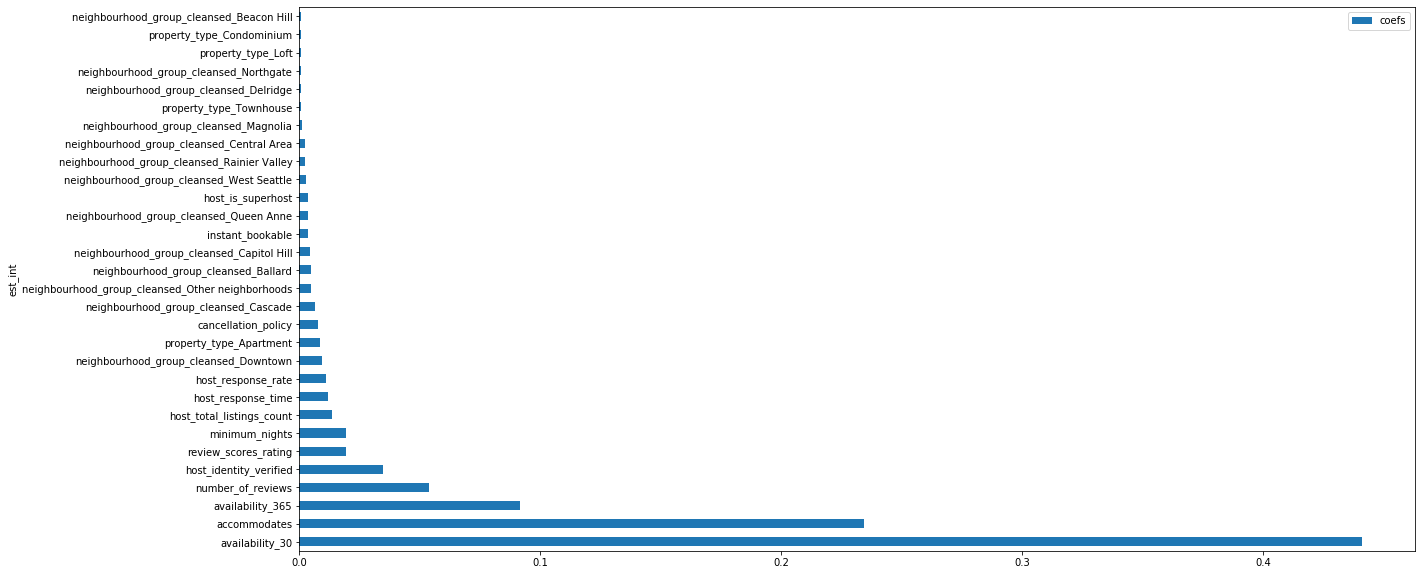

In [295]:
coefs_df.sort_values('coefs', ascending=False).head(30).plot(kind = 'barh',figsize = (20,10));

### Evaluating Results: <a name="evaluating_results"></a>
Once I eliminated the variables which were too highly correlated, I was still left with 47 unique variables that could have possibly contributed to the value of profit to be made in the next 60 days. It is unsurprising that the largest factor in affecting profit to be made in the next 60 days is the number of bookings/availability in the next 30. The second most contributing factor is the number of people that the listing is able to accomodate. This is interesting and is likely because it has an effect on number of bedrooms, therefore listing size and therefore profit. I would have anticipated that the neighborhoods would have had more of an affect than it seems they do.

## Next Steps<a name="next_steps"></a>
 Next it would be interesting to dive further into modeling and try out different types of models. Perhaps I could even build a model attempting to predict price.